In [1]:
import time  # for execution time comparison

import matplotlib.pyplot as plt  # for display purposes
import my_plotter
import ruptures as rpt  # our package
from ruptures.metrics import hausdorff
import pandas as pd
infile="/Users/irffanalahi/Research/Research_code/gitignorefolder/DMRrelated/ITGAE_patternrecognition/changepointtest/ITGAEp_cin_nr0.5_imputed_rowmean_noDMRincluded.txt"
indf=pd.read_csv(infile,sep="\t",index_col=0)
minCpG=3
penalty_value = 3.5  # beta
indf.head()

,CD8TIL-CD4PBL,CD8TIL-CD8PBL,CD8TIL-nB,CD8TIL-NK,CD8TIL-MnPBL,CD8TIL-iDC,CD8TIL-mDC,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR
position,,,,,,,,,,
chr17:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr17:2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr17:3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr17:4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr17:5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
signal=indf.to_numpy()
n_bkps=2

(<Figure size 720x1800 with 10 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbc6f21128>,
       dtype=object))

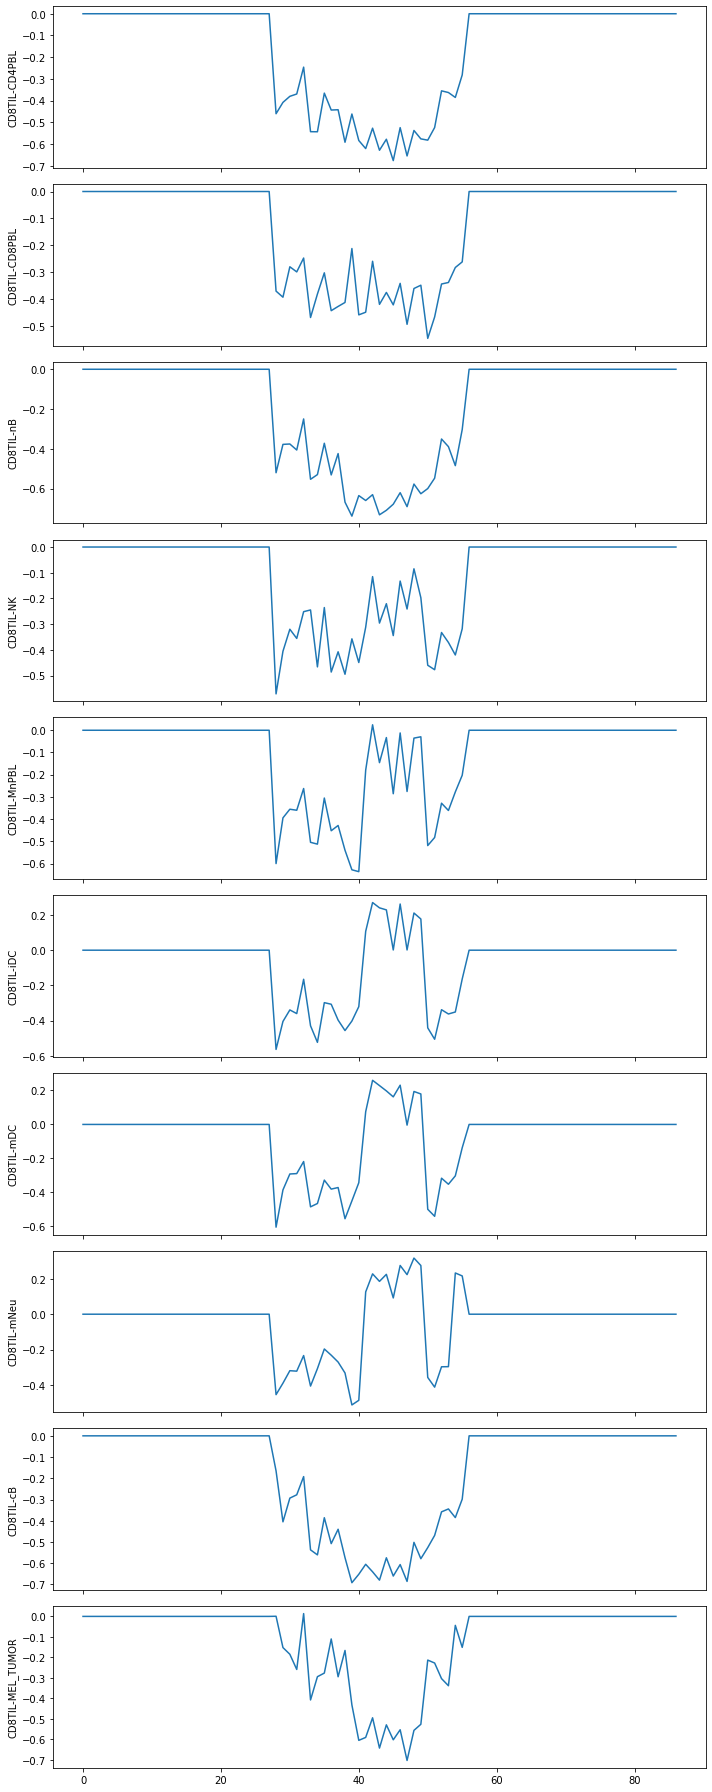

In [3]:
bkps=[12,23]

my_plotter.display(indf,bkps)

In [4]:
algo_python = rpt.Dynp(model="l2", jump=1, min_size=minCpG).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="linear", min_size=minCpG).fit(signal)  # written in C

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.114 s
C implementation:	0.000 s


In [5]:
bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[28, 56, 87]
C implementation:	[28, 56, 87]
(Hausdorff distance: 0 samples)


In [6]:
params = {"gamma": 1e-2}
algo_python = rpt.Dynp(model="rbf", params=params, jump=1, min_size=minCpG).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="rbf", params=params, min_size=minCpG).fit(
    signal
)  # written in C

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.089 s
C implementation:	0.000 s


In [7]:
bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[28, 56, 87]
C implementation:	[28, 56, 87]
(Hausdorff distance: 0 samples)


In [8]:
#####PELT#####
algo_python = rpt.Pelt(model="l2", jump=1, min_size=minCpG).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="linear", min_size=minCpG).fit(
    signal
)  # written in C, same class as before




for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(pen=penalty_value)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.055 s
C implementation:	0.000 s


In [9]:
bkps_python = algo_python.predict(pen=penalty_value)
bkps_c = algo_c.predict(pen=penalty_value)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
#print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[28, 41, 50, 56, 87]
C implementation:	[28, 41, 50, 56, 87]


In [10]:
#fig,_=my_plotter.display(indf, bkps, bkps_python)
#plt.show()
#fig.savefig(infile+"_linearresult"+str(minCpG)+".pdf")

In [11]:
algo_python = rpt.Pelt(model="rbf", jump=1, min_size=minCpG).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="rbf", min_size=minCpG).fit(
    signal
)  # written in C, same class as before




for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(pen=penalty_value)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.019 s
C implementation:	0.000 s


In [12]:
bkps_python = algo_python.predict(pen=penalty_value)
bkps_c = algo_c.predict(pen=penalty_value)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[28, 41, 50, 56, 87]
C implementation:	[28, 41, 50, 56, 87]
(Hausdorff distance: 0 samples)


In [13]:


forindexgenerate=bkps_python
if forindexgenerate[-1]==len(indf.index):
    print("hereeeee")
    forindexgenerate[-1]=forindexgenerate[-1]-1
indf.index[forindexgenerate]


hereeeee


Index(['chr17:3800170', 'chr17:3801162', 'chr17:3801494', 'chr17:3901628',
       'chr17:3901658'],
      dtype='object', name='position')

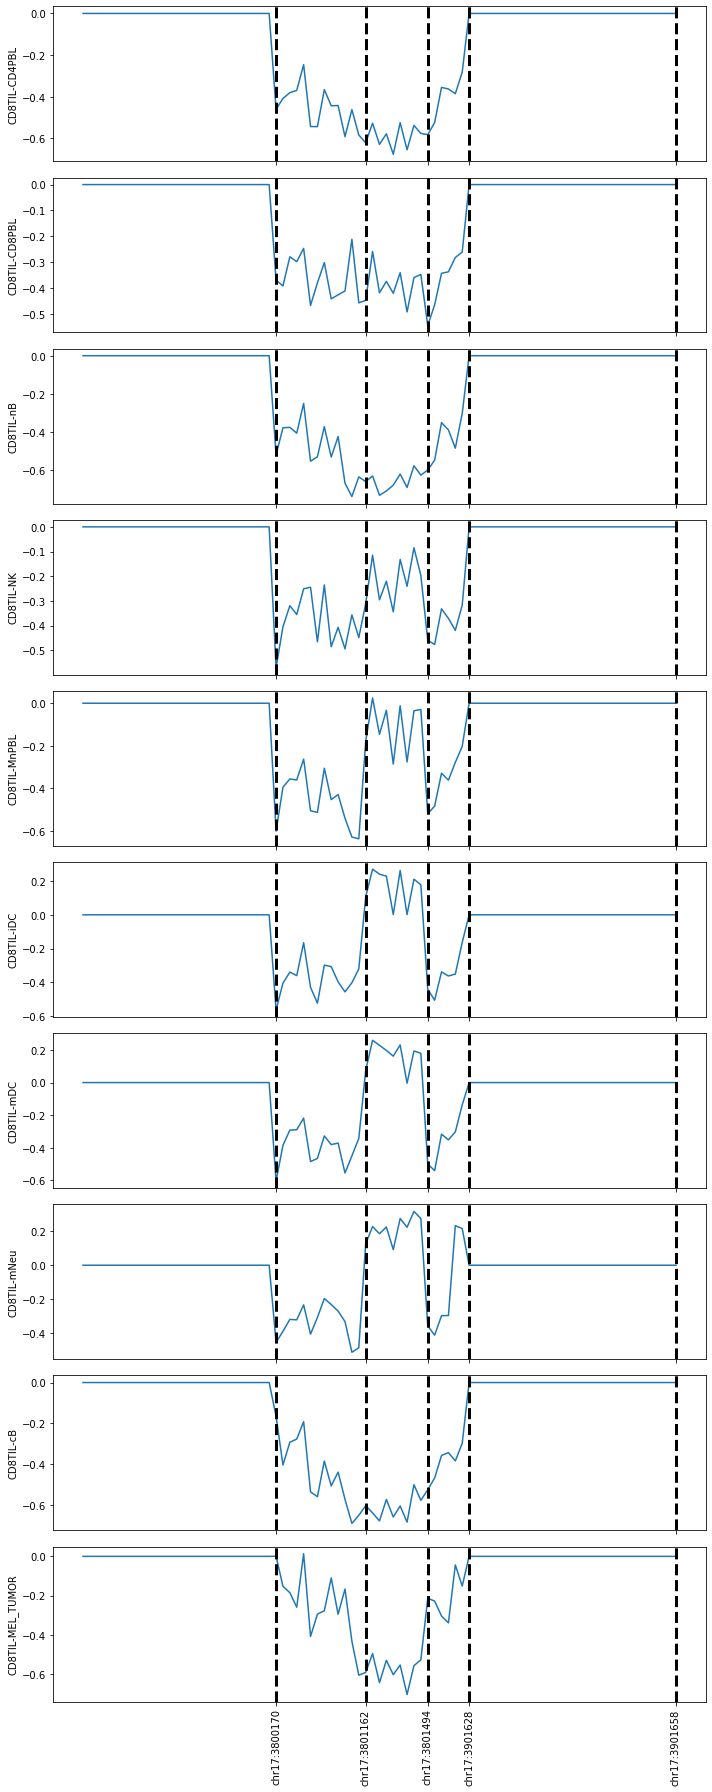

In [14]:
fig,_=my_plotter.display(indf, bkps, bkps_python)
plt.show()
#fig.savefig(infile+"_RBFresult"+str(minCpG)+".pdf")